In [8]:
import qiskit
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer
from qiskit.visualization import plot_histogram

In [13]:
qr = QuantumRegister(3, 'q')
cr = ClassicalRegister(1, 'c')
qc = QuantumCircuit(qr, cr)

In [14]:
qc.draw()

q_0: 
     
q_1: 
     
q_2: 
     
c: 1/

In [15]:
qc.h(0)
qc.h(1)
qc.draw()

┌───┐
q_0: ┤ H ├
     ├───┤
q_1: ┤ H ├
     └───┘
q_2: ─────
          
c: 1/═════

In [16]:
qc.measure([0], [0])
qc.draw()

┌───┐┌─┐
q_0: ┤ H ├┤M├
     ├───┤└╥┘
q_1: ┤ H ├─╫─
     └───┘ ║ 
q_2: ──────╫─
           ║ 
c: 1/══════╩═
           0

Result(backend_name='qasm_simulator', backend_version='0.10.4', qobj_id='0be82226-2d8b-4cb8-9209-52cbd7269c23', job_id='61a49366-ef0f-4119-b52b-47876bc86e15', success=True, results=[ExperimentResult(shots=1024, success=True, meas_level=2, data=ExperimentResultData(counts={'0x0': 520, '0x1': 504}), header=QobjExperimentHeader(clbit_labels=[['c', 0]], creg_sizes=[['c', 1]], global_phase=0.0, memory_slots=1, metadata={}, n_qubits=3, name='circuit-178', qreg_sizes=[['q', 3]], qubit_labels=[['q', 0], ['q', 1], ['q', 2]]), status=DONE, seed_simulator=518159560, metadata={'batched_shots_optimization': False, 'method': 'stabilizer', 'active_input_qubits': [0], 'device': 'CPU', 'remapped_qubits': False, 'num_qubits': 1, 'num_clbits': 1, 'input_qubit_map': [[0, 0]], 'measure_sampling': True, 'noise': 'ideal', 'parallel_shots': 1, 'parallel_state_update': 16, 'fusion': {'enabled': False}}, time_taken=0.0008147)], date=2022-06-20T16:26:13.730584, status=COMPLETED, status=QobjHeader(backend_name='q

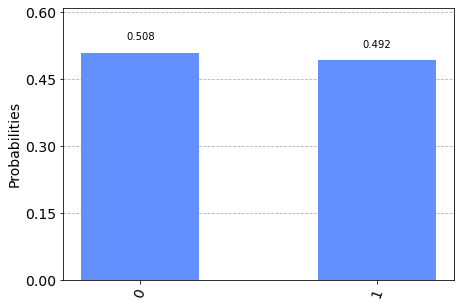

In [17]:
# Use Aer's qasm_simulator
simulator = Aer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator
job = execute(qc, simulator, shots=1024)

# Grab results from the job
result = job.result()
print(result)
print(result.time_taken)

# Returns counts
counts = result.get_counts()
print(counts)

# Plot a histogram
plot_histogram(counts)

In [10]:
def get_expection_from_counts(counts):
    z0 = {'0':0, '1':0}
    z1 = {'0':0, '1':0}
    counts_sum = sum(counts.values())
    for s in counts:
        z0[s[1]] += counts[s] / counts_sum
        z1[s[0]] += counts[s] / counts_sum

    z0_e = z0['0'] - z0['1']
    z1_e = z1['0'] - z1['1']

    return z0_e, z1_e

print(get_expection_from_counts(counts))

AttributeError: 'list' object has no attribute 'values'

In [8]:
sum(counts.values())

1000

In [9]:
from qiskit.circuit.library import RealAmplitudes
ansatz = RealAmplitudes(4, reps=2)
ansatz.decompose().draw()

┌──────────┐                    ┌──────────┐                             »
q_0: ┤ Ry(θ[0]) ├──■────■─────────■──┤ Ry(θ[4]) ├─────────────────■────────■──»
     ├──────────┤┌─┴─┐  │         │  └──────────┘┌──────────┐   ┌─┴─┐      │  »
q_1: ┤ Ry(θ[1]) ├┤ X ├──┼────■────┼───────■──────┤ Ry(θ[5]) ├───┤ X ├──────┼──»
     ├──────────┤└───┘┌─┴─┐┌─┴─┐  │       │      └──────────┘┌──┴───┴───┐┌─┴─┐»
q_2: ┤ Ry(θ[2]) ├─────┤ X ├┤ X ├──┼───────┼───────────■──────┤ Ry(θ[6]) ├┤ X ├»
     ├──────────┤     └───┘└───┘┌─┴─┐   ┌─┴─┐       ┌─┴─┐    ├──────────┤└───┘»
q_3: ┤ Ry(θ[3]) ├───────────────┤ X ├───┤ X ├───────┤ X ├────┤ Ry(θ[7]) ├─────»
     └──────────┘               └───┘   └───┘       └───┘    └──────────┘     »
«               ┌──────────┐                         
«q_0: ───────■──┤ Ry(θ[8]) ├─────────────────────────
«            │  └──────────┘┌──────────┐             
«q_1: ──■────┼───────■──────┤ Ry(θ[9]) ├─────────────
«     ┌─┴─┐  │       │      └──────────┘┌───────────┐
«q_2: ┤ X ├──┼───────┼───────────■──────┤ Ry(θ[10]) ├
«     └───┘┌─┴─┐   ┌─┴─┐       ┌─┴─┐    ├───────────┤
«q_3: ─────┤ X ├───┤ X ├───────┤ X ├────┤ Ry(θ[11]) ├
«          └───┘   └───┘       └───┘    └───────────┘

In [10]:
ansatz = RealAmplitudes(5, reps=2)
ansatz.decompose().draw()

┌──────────┐                              ┌──────────┐                 »
q_0: ┤ Ry(θ[0]) ├──■────■─────────■─────────■──┤ Ry(θ[5]) ├─────────────────»
     ├──────────┤┌─┴─┐  │         │         │  └──────────┘     ┌──────────┐»
q_1: ┤ Ry(θ[1]) ├┤ X ├──┼────■────┼────■────┼────────────────■──┤ Ry(θ[6]) ├»
     ├──────────┤└───┘┌─┴─┐┌─┴─┐  │    │    │                │  └──────────┘»
q_2: ┤ Ry(θ[2]) ├─────┤ X ├┤ X ├──┼────┼────┼───────■────────┼───────■──────»
     ├──────────┤     └───┘└───┘┌─┴─┐┌─┴─┐  │     ┌─┴─┐      │       │      »
q_3: ┤ Ry(θ[3]) ├───────────────┤ X ├┤ X ├──┼─────┤ X ├──────┼───────┼──────»
     ├──────────┤               └───┘└───┘┌─┴─┐   └───┘    ┌─┴─┐   ┌─┴─┐    »
q_4: ┤ Ry(θ[4]) ├─────────────────────────┤ X ├────────────┤ X ├───┤ X ├────»
     └──────────┘                         └───┘            └───┘   └───┘    »
«                                                 ┌───────────┐     »
«q_0: ─────■───────────■─────────────■─────────■──┤ Ry(θ[10]) ├─────»
«        ┌─┴─┐         │             │         │  └───────────┘     »
«q_1: ───┤ X ├─────────┼────────■────┼────■────┼─────────────────■──»
«     ┌──┴───┴───┐   ┌─┴─┐    ┌─┴─┐  │    │    │                 │  »
«q_2: ┤ Ry(θ[7]) ├───┤ X ├────┤ X ├──┼────┼────┼────────■────────┼──»
«     └──────────┘┌──┴───┴───┐└───┘┌─┴─┐┌─┴─┐  │      ┌─┴─┐      │  »
«q_3: ─────■──────┤ Ry(θ[8]) ├─────┤ X ├┤ X ├──┼──────┤ X ├──────┼──»
«        ┌─┴─┐    ├──────────┤     └───┘└───┘┌─┴─┐    └───┘    ┌─┴─┐»
«q_4: ───┤ X ├────┤ Ry(θ[9]) ├───────────────┤ X ├─────────────┤ X ├»
«        └───┘    └──────────┘               └───┘             └───┘»
«                                            
«q_0: ───────────────────────────────────────
«     ┌───────────┐                          
«q_1: ┤ Ry(θ[11]) ├──────────────────────────
«     └───────────┘┌───────────┐             
«q_2: ──────■──────┤ Ry(θ[12]) ├─────────────
«           │      └───────────┘┌───────────┐
«q_3: ──────┼────────────■──────┤ Ry(θ[13]) ├
«         ┌─┴─┐        ┌─┴─┐    ├───────────┤
«q_4: ────┤ X ├────────┤ X ├────┤ Ry(θ[14]) ├
«         └───┘        └───┘    └───────────┘

In [11]:
from qiskit import IBMQ


IBMQ.save_account('c3b52ec58a6bf8edf796502a6075afc3dcf7636cd5ecff99fea0b145371cc88c93ff550e7f81c65457b168ac7b06c5ae1024b45c46d88d61964a9ad35c97b18d')

configrc.store_credentials:WARNING:2022-06-15 17:28:33,755: Credentials already present. Set overwrite=True to overwrite.


In [12]:
IBMQ.load_account() # Load account from disk
provider = IBMQ.get_provider(hub='ibm-q')
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_bogota') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_m

In [25]:
from timeit import default_timer as timer
from qiskit.tools.monitor import job_monitor
#IBMQ.load_account()
provider = IBMQ.get_provider(group='open')
bkend = provider.get_backend('ibmq_qasm_simulator') #'ibmq_qasm_simulator'
time1 = timer()
job = execute(qc, bkend, shots=1024)
time2 = timer()
print(time2-time1)
job_monitor(job)

43.96418559999984
Job Status: job has successfully run


Result(backend_name='ibmq_qasm_simulator', backend_version='0.10.4', qobj_id='dd35b60e-4d9a-4b2e-a63f-349c9db3e649', job_id='62a9a72f9b5e97bb58fc3bfa', success=True, results=[ExperimentResult(shots=1024, success=True, meas_level=2, data=ExperimentResultData(counts={'0x0': 240, '0x1': 270, '0x2': 260, '0x3': 254}), header=QobjExperimentHeader(clbit_labels=[['c', 0], ['c', 1]], creg_sizes=[['c', 2]], global_phase=0.0, memory_slots=2, metadata={}, n_qubits=3, name='circuit-0', qreg_sizes=[['q', 3]], qubit_labels=[['q', 0], ['q', 1], ['q', 2]]), status=DONE, metadata={'active_input_qubits': [0, 1], 'batched_shots_optimization': False, 'device': 'CPU', 'fusion': {'enabled': False}, 'input_qubit_map': [[1, 1], [0, 0]], 'measure_sampling': True, 'method': 'stabilizer', 'noise': 'ideal', 'num_clbits': 2, 'num_qubits': 2, 'parallel_shots': 1, 'parallel_state_update': 16, 'remapped_qubits': False}, seed_simulator=2079632637, time_taken=0.001919415)], date=2022-06-15 17:32:35.312261+08:00, status

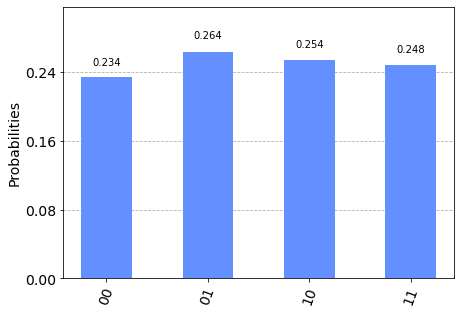

In [18]:
result = job.result()
print(result)
counts = result.get_counts()
plot_histogram(counts)

In [19]:
print(result.time_taken)

0.002088474


In [20]:
from qiskit.providers.ibmq import least_busy

small_devices = provider.backends(filters=lambda x: x.configuration().n_qubits == 5
                                   and not x.configuration().simulator)
least_busy(small_devices)

<IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>

Job Status: job has successfully run
Result(backend_name='ibmq_quito', backend_version='1.1.30', qobj_id='f8d2d481-cb50-4161-acf7-ac306564334d', job_id='62a9ae559b38af5c60425a61', success=True, results=[ExperimentResult(shots=1024, success=True, meas_level=2, data=ExperimentResultData(counts={'0x0': 258, '0x1': 279, '0x2': 239, '0x3': 248}), header=QobjExperimentHeader(qubit_labels=[['q', 0], ['q', 1], ['q', 2], ['q', 3], ['q', 4]], n_qubits=5, qreg_sizes=[['q', 5]], clbit_labels=[['c', 0], ['c', 1]], memory_slots=2, creg_sizes=[['c', 2]], name='circuit-0', global_phase=1.5707963267948966, metadata={}))], date=2022-06-15 18:10:56+08:00, status=Successful completion, status=QobjHeader(backend_name='ibmq_quito', backend_version='1.1.30'), execution_id='708aad52-ec93-11ec-aabe-b02628f7f59e', time_taken=2.671682357788086, error=None, client_version={'qiskit': '0.36.2'})


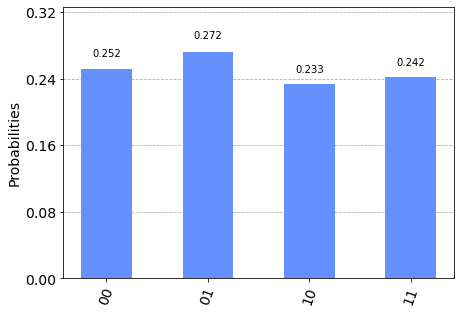

In [21]:
bkend = least_busy(small_devices)
job = execute(qc, bkend, shots=1024)
job_monitor(job)

result = job.result()
print(result)
counts = result.get_counts()
plot_histogram(counts)

In [26]:
from qiskit.providers.ibmq.managed import IBMQJobManager
job_manager = IBMQJobManager()
job_set_multiple = job_manager.run([qc]*2, backend=bkend, max_experiments_per_job=2)
results = job_set_multiple.results()
print(results.combine_results())

In [36]:
print(results.combine_results().time_taken)

0.014425872
